# CheckAtlas examples : Raw atlas (Cellranger) vs final atlas (Scanpy)

In this example, we show how to run checkatlas in a folder containing 2 different data type: Scanpy and Cellranger. The Cellranger being the raw data out of cellranger; The Scanpy data being the same datasets after proper analysis and annotation.  PBMC 3K sample.

WARNING: Install and run only MultiQC from https://github.com/becavin-lab/MultiQC/tree/checkatlas. Otherwise checkatlas files will not be taken into account.

## Download cellranger dataset : PBMC 3k and PBMC 68k

The Cellranger file is directly downloaded from 10xGenomics database.

PBMC 3k
https://www.10xgenomics.com/resources/datasets/3-k-pbm-cs-from-a-healthy-donor-1-standard-1-1-0

And PBMC 68k
https://www.10xgenomics.com/resources/datasets/fresh-68-k-pbm-cs-donor-a-1-standard-1-1-0

In [4]:
%%bash
rm -rf data4/pbmc_5k_cellranger

In [2]:
%%bash
mkdir -p data4
DATA_NAME=pbmc_3k_v1
mkdir data4/${DATA_NAME}
mkdir data4/${DATA_NAME}/outs
cd data4/${DATA_NAME}/outs

curl -O https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
curl -O https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_analysis.tar.gz
curl -O https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_web_summary.html

tar -xvf pbmc3k_filtered_gene_bc_matrices.tar.gz
tar -xvf pbmc3k_analysis.tar.gz
rm pbmc3k_filtered_gene_bc_matrices.tar.gz
rm pbmc3k_analysis.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7443k  100 7443k    0     0  21.4M      0 --:--:-- --:--:-- --:--:-- 21.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5M  100 12.5M    0     0  21.3M      0 --:--:-- --:--:-- --:--:-- 21.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2869k    0 2869k    0     0  11.5M      0 --:--:-- --:--:-- --:--:-- 11.5M


filtered_gene_bc_matrices/
filtered_gene_bc_matrices/hg19/
filtered_gene_bc_matrices/hg19/matrix.mtx
filtered_gene_bc_matrices/hg19/genes.tsv
filtered_gene_bc_matrices/hg19/barcodes.tsv
analysis/
analysis/pca/
analysis/pca/projection.csv
analysis/pca/components.csv
analysis/kmeans/
analysis/kmeans/2_clusters/
analysis/kmeans/2_clusters/clusters.csv
analysis/kmeans/2_clusters/differential_expression.csv
analysis/kmeans/3_clusters/
analysis/kmeans/3_clusters/clusters.csv
analysis/kmeans/3_clusters/differential_expression.csv
analysis/kmeans/4_clusters/
analysis/kmeans/4_clusters/clusters.csv
analysis/kmeans/4_clusters/differential_expression.csv
analysis/kmeans/5_clusters/
analysis/kmeans/5_clusters/clusters.csv
analysis/kmeans/5_clusters/differential_expression.csv
analysis/kmeans/6_clusters/
analysis/kmeans/6_clusters/clusters.csv
analysis/kmeans/6_clusters/differential_expression.csv
analysis/kmeans/7_clusters/
analysis/kmeans/7_clusters/clusters.csv
analysis/kmeans/7_clusters/differe

In [5]:
%%bash
mkdir -p data4
DATA_NAME=pbmc_68k_v1
mkdir data4/${DATA_NAME}
mkdir data4/${DATA_NAME}/outs
cd data4/${DATA_NAME}/outs

curl -O https://cf.10xgenomics.com/samples/cell-exp/1.1.0/fresh_68k_pbmc_donor_a/fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz
curl -O https://cf.10xgenomics.com/samples/cell-exp/1.1.0/fresh_68k_pbmc_donor_a/fresh_68k_pbmc_donor_a_analysis.tar.gz
curl -O https://cf.10xgenomics.com/samples/cell-exp/1.1.0/fresh_68k_pbmc_donor_a/fresh_68k_pbmc_donor_a_web_summary.html

tar -xvf fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz
tar -xvf fresh_68k_pbmc_donor_a_analysis.tar.gz
rm fresh_68k_pbmc_donor_a_filtered_gene_bc_matrices.tar.gz
rm fresh_68k_pbmc_donor_a_analysis.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  118M  100  118M    0     0  27.4M      0  0:00:04  0:00:04 --:--:-- 27.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  24.2M      0 --:--:-- --:--:-- --:--:-- 24.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4517k    0 4517k    0     0  2363k      0 --:--:--  0:00:01 --:--:-- 2362k


filtered_matrices_mex/
filtered_matrices_mex/hg19/
filtered_matrices_mex/hg19/barcodes.tsv
filtered_matrices_mex/hg19/genes.tsv
filtered_matrices_mex/hg19/matrix.mtx
analysis_csv/
analysis_csv/kmeans/
analysis_csv/kmeans/10_clusters/
analysis_csv/kmeans/10_clusters/clusters.csv
analysis_csv/kmeans/10_clusters/differential_expression.csv
analysis_csv/kmeans/2_clusters/
analysis_csv/kmeans/2_clusters/clusters.csv
analysis_csv/kmeans/2_clusters/differential_expression.csv
analysis_csv/kmeans/3_clusters/
analysis_csv/kmeans/3_clusters/clusters.csv
analysis_csv/kmeans/3_clusters/differential_expression.csv
analysis_csv/kmeans/4_clusters/
analysis_csv/kmeans/4_clusters/clusters.csv
analysis_csv/kmeans/4_clusters/differential_expression.csv
analysis_csv/kmeans/5_clusters/
analysis_csv/kmeans/5_clusters/clusters.csv
analysis_csv/kmeans/5_clusters/differential_expression.csv
analysis_csv/kmeans/6_clusters/
analysis_csv/kmeans/6_clusters/clusters.csv
analysis_csv/kmeans/6_clusters/differential_e

## Getting Scanpy datasets

The following scripts are from scanpy tutorial: https://scanpy-tutorials.readthedocs.io/en/latest/integrating-data-using-ingest.html#PBMCs

In [24]:
import scanpy as sc
import pandas as pd
import seaborn as sns

sc.settings.verbosity = (
    1  # verbosity: errors (0), warnings (1), info (2), hints (3)
)
sc.settings.set_figure_params(
    dpi=80, frameon=False, figsize=(3, 3), facecolor="white"
)

/home/becavin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


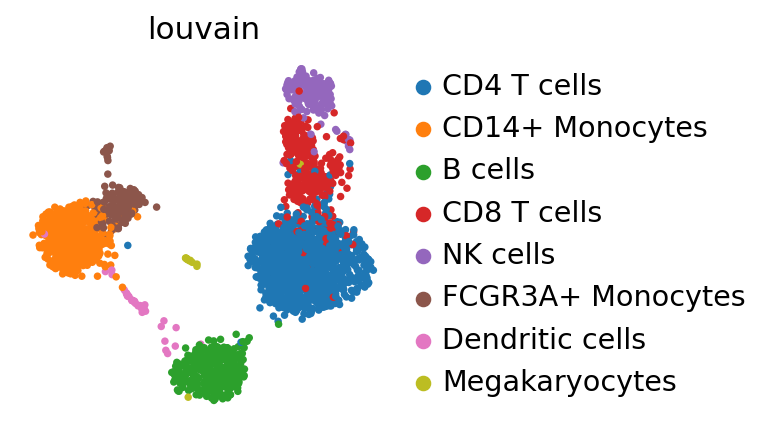

In [25]:
adata_ref = (
    sc.datasets.pbmc3k_processed()
)  # this is an earlier version of the dataset from the pbmc3k tutorial
adata = sc.datasets.pbmc68k_reduced()
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color="louvain")

/home/becavin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/becavin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


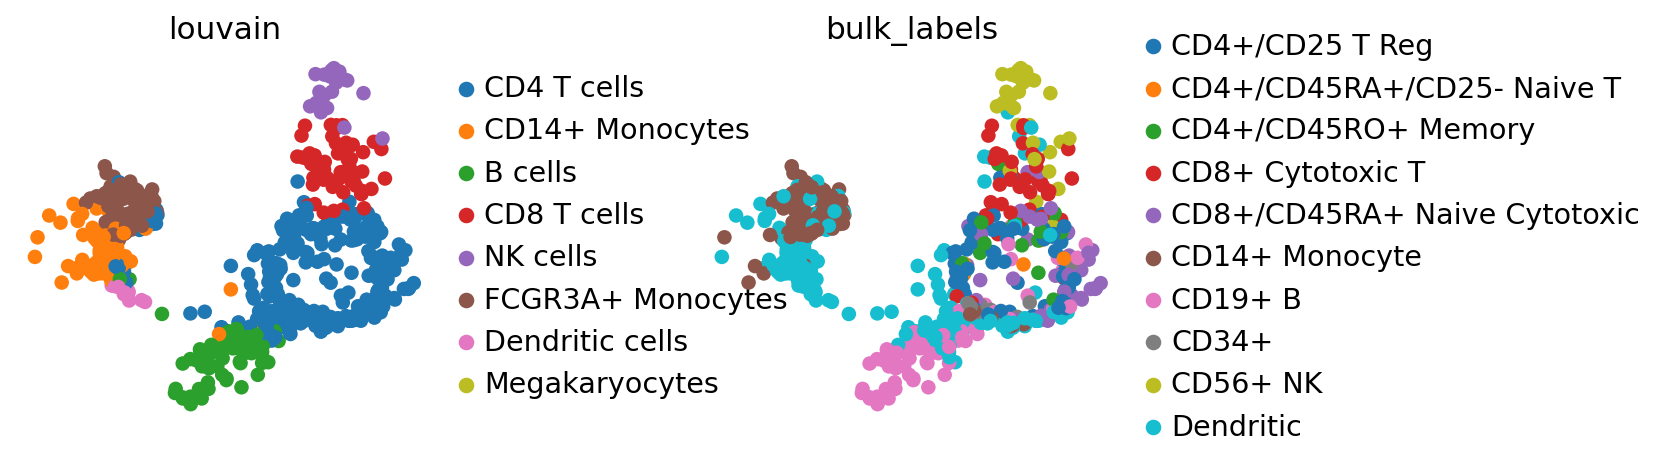

In [26]:
# Atlas integration
sc.tl.ingest(adata, adata_ref, obs="louvain")
adata.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]  # fix colors
sc.pl.umap(adata, color=["louvain", "bulk_labels"], wspace=0.5)

In [27]:
# Save atlas
import os

adata_path = os.path.join(os.getcwd(), "data4", "pbmc_3k_68k_integrated.h5ad")
adata.write_h5ad(adata_path)

In [28]:
%%bash
echo "Verif downloaded datasets"
cd data4/
ls

Verif downloaded datasets
pbmc_3k_68k_integrated.h5ad
pbmc_5k_cellranger


## Run checkatlas

If checkatlas is installed in your environment, you just need to run this cell. This will produce all metric tables and figures needed.

In [10]:
%%bash
nextflow run nf-core-checkatlas -r dev --path /data/analysis/data_becavin/checkatlas_test/tuto/data4/

N E X T F L O W  ~  version 23.04.1
Launching `https://github.com/becavin-lab/nf-core-checkatlas` [condescending_yonath] DSL2 - revision: 430870ba28 [dev]


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/checkatlas v1.0dev-g430870b
------------------------------------------------------
Core Nextflow options
  revision   : dev
  runName    : condescending_yonath
  launchDir  : /data/analysis/data_becavin/checkatlas_test/tuto
  workDir    : /data/analysis/data_becavin/checkatlas_test/tuto/work
  projectDir : /home/becavin/.nextflow/assets/becavin-lab/nf-core-checkatlas
  userName   : becavin
  profile    : standard
  configFiles: 

Input/output options
  path       : /data/analysis/data_becavin/checkatlas_test/tuto/data4/
  outdi

## Open MultiQC report

Once checkatlas has been run, all tables and fig and html reports can be found in the checkatlas_files folder. 
The MultiQC html summary files is in checkatlas_files/CheckAtlas_MultiQC.html.

In [12]:
from IPython.display import IFrame

IFrame(
    src="data4/checkatlas_files/Checkatlas_MultiQC.html",
    width="100%",
    height="500px",
)